___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://ichi.pro/assets/images/max/724/0*INqwwHXgTabQx7wM.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://ichi.pro/assets/images/max/724/0*INqwwHXgTabQx7wM.png</p>

### <font color= #2E9AFE> Tema: Máquinas de Vector Soporte (SVC) para Clasificación</font>

**¿Qué es?**

El objetivo de este algoritmo es encontrar un hiperplano un un espacio N-dimensional (N = número de variables) que clasifica datos

Se busca encontrar un hiperplano que tenga el margen máximo (máxima distancia) entre los puntos de ambas clases. 

<img style="float: center; margin: 15px 15px 0px 0px;" src="https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png" width="250px" height="80px" />

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png" width="250px" height="80px" />


**¿En qué conceptos se fundamenta?**

- En el "Maximal Margin Classifier"
- En el concepto de hiperplano

**Su ecuación**

$$
\min _{\mathbf{w}, b}\|\mathbf{w}\|^{2}+C \sum_{i=1}^{n} \xi_{i}^{p} \text { under constraints } y_{i}\left(\mathbf{w} \cdot \mathbf{x}_{i}+b\right) \geq 1-\xi_{i}, \quad \xi_{i} \geq 0
$$


**El truco del Kernel**

No todos los datos son linealmente separables, casi todos los datos están aleatoriamente distribuidos, lo cual hace difícil separar linealmente los datos. 

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png" width="450px" height="280px" />

En escencia, lo que hace el truco del kernel es ofrecer una manera más eficiente y menos costosa de aumentar la dimensionalidad de los datos. 

**Algunos tipos de kernel**
- Lineal
$$K(x,x*)=x \cdot x^{*}$$
- Polinomial 
$$K(x,x*)=(x \cdot x^{*} +1)^{d}$$
- Gaussian Radial Basis 
$$K(x,x*)=\exp^{-\frac{\|x-x^{*}\|^{2}}{2\sigma^{2}}}=\exp^{-\gamma\|x-x^{*}\|^{2}} $$

**Se deben cumplir varias cosas para obtener el resultado óptimo:**

- Este algoritmo funciona muy bien si se tienen los datos limpios. Si los datos están muy dispersos no se podrá crear una fórmula adecuada. Se recomienda estandarizar los datos previamente. 
- No es adecuado para conjuntos de datos grandes. Lleva mucho tiempo el entrenamiento
- Menos efectivo en conjuntos de datos con columnas superpuestas


#### Observando qué hace la máquina
#### Ejemplo 1 Kernel lineal y suavisando los márgenes

In [1]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# use seaborn plotting defaults
import seaborn as sns; sns.set()

¿Qué pasaría si tenemos datos no tan limpios y tenemos clases que se sobreponen?

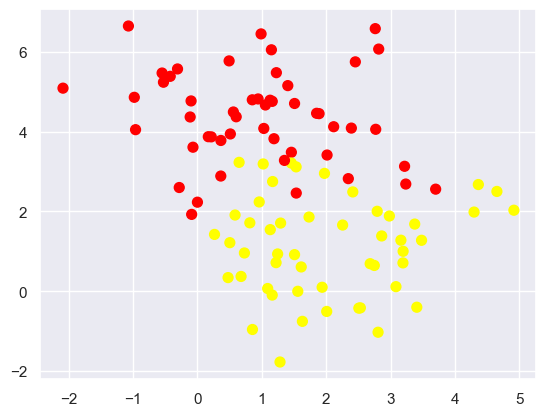

In [2]:
#datos
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2) # por default hace 2 "x"
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [3]:
X.shape

(100, 2)

In [4]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Graficar la función de decisón para un SVC en dos dimensiones"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # crear malla para evaluar el modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # graficar el límite de decisión y los márgenes
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # graficar vectores de soporte
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Para manejar este caso, a máquina de SVM tiene un factor que "suaviza" el margen. Osea que permite que algunos puntos sean mal clasificados de manera que se predigan mejor los datos. 

La dureza del margen es controlada por un parámetro, conocido como "C". 

Con una "C" muy grande, el margen es duro y no permite errores de clasificación. 

Con una "C" más pequeña, el margen es más suave y permite algunos errores de clasificación. 

El gráfico siguiente muestra visualmente cómo diferentes valores de "C" afectan al ajuste final. 

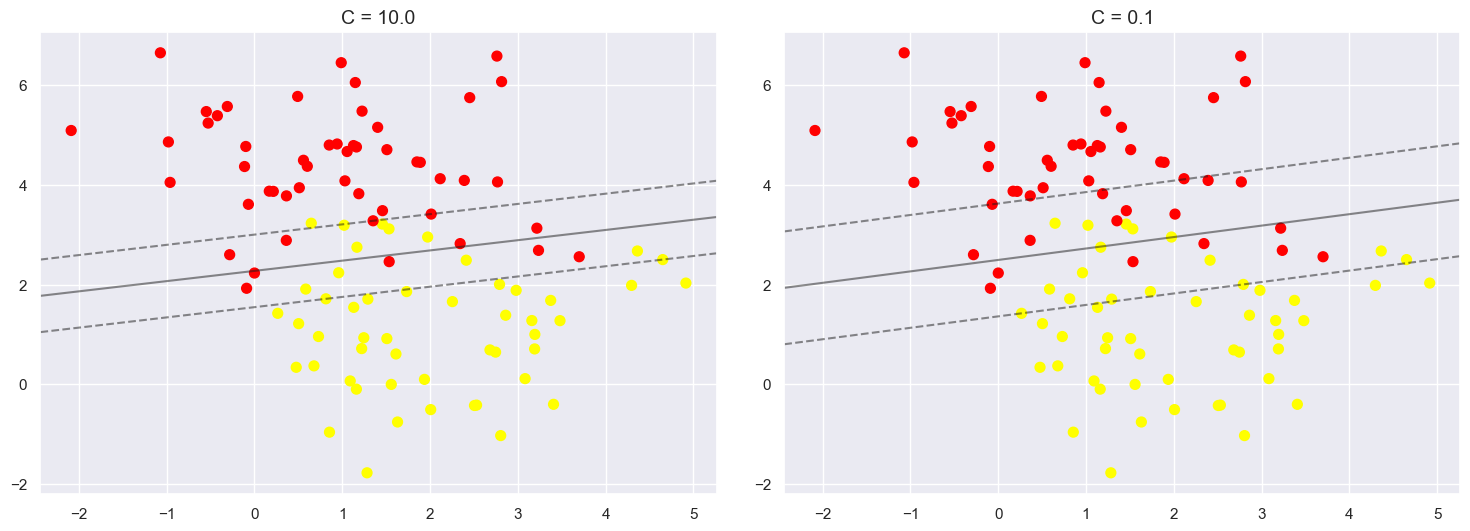

In [6]:
#Graficamos la máquina de vector soporte
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

#probar con dos diferentes parámetros (C=10, C=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = svm.SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

El valor óptimo de C depende de los datos, y debe de ser tuneado usando cross-validation o algún método similar. 

#### Ejemplo 2 varios tipos de kernel

In [7]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,svm
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score)
import pandas as pd


In [8]:
#Evaluación de performance
def eval_perform(Y,Yhat):
    accu = accuracy_score(Y,Yhat)
    prec = precision_score(Y,Yhat,average='weighted')
    reca = recall_score(Y,Yhat,average='weighted')
    print('\n \t Accu \t Prec \t Reca\n Eval \t %0.3f \t %0.3f \t %0.3f'%(accu,prec,reca))

In [9]:
#Importar datos
data = pd.read_csv('../../data/raw/ex2data2.txt',header=None)
X = data.iloc[:,0:2]
Y = data.iloc[:,2]

In [10]:
X

,0,1
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


In [11]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
113    0
114    0
115    0
116    0
117    0
Name: 2, Length: 118, dtype: int64

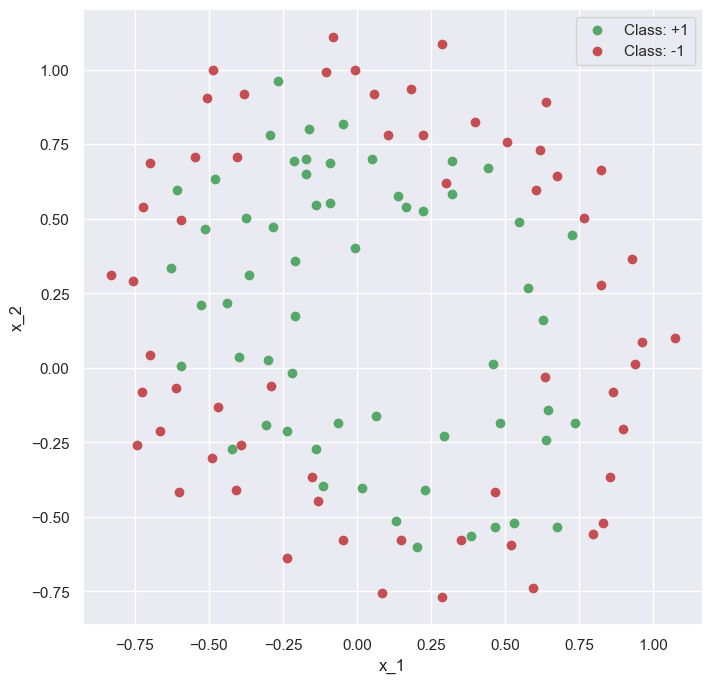

In [12]:
#Visualización de los datos
fig = plt.figure(figsize=(8,8))
indx = Y==1
plt.scatter(X[0][indx],X[1][indx],c='g',label='Class: +1')
plt.scatter(X[0][~indx],X[1][~indx],c='r',label='Class: -1')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()


In [13]:
#Crear el modelo
# modelo = svm.SVC(kernel='linear')
# modelo = svm.SVC(kernel='poly',degree=2,C=1)
modelo = svm.SVC(kernel='rbf',C=1000,gamma='auto') #rbf #radial
modelo.fit(X,Y)

Yhat = modelo.predict(X)

eval_perform(Y,Yhat)


 	 Accu 	 Prec 	 Reca
 Eval 	 0.856 	 0.859 	 0.856


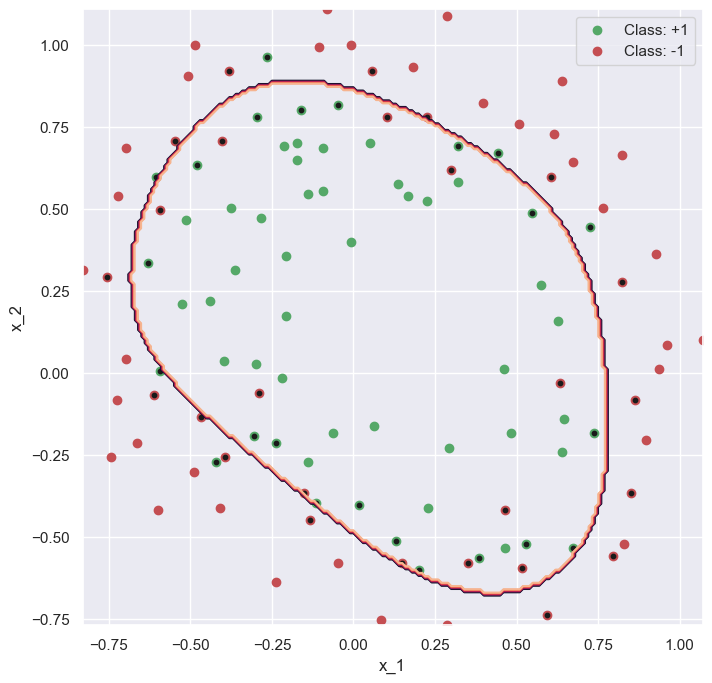

In [14]:
#Ver el límite de decisión
h = 0.01
xmin,xmax,ymin,ymax = X[0].min(),X[0].max(),X[1].min(),X[1].max()
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

Xnew = pd.DataFrame(np.c_[xx.ravel(),yy.ravel()])

Z = modelo.predict(Xnew)
Z = Z.reshape(xx.shape)

vs = modelo.support_vectors_

indx = Y==1
fig = plt.figure(figsize=(8,8))
plt.scatter(X[0][indx],X[1][indx],c='g',label='Class: +1')
plt.scatter(X[0][~indx],X[1][~indx],c='r',label='Class: -1')
plt.contour(xx,yy,Z)
plt.scatter(vs[:,0],vs[:,1],s=10,facecolors='k')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()


#### Ejemplo: Reconocimiento Facial

Vamos a tomar un problema de reconocimiento facial. Usaremos unos datos que consisten en miles de fotos recolectadas de varias figuras públicas, está disponible en Scikit-Learn. 



In [15]:
from sklearn.datasets import fetch_lfw_people

#Vamos a obtener las caras de personas que tienen al menos 60 fotografías
faces = fetch_lfw_people(min_faces_per_person=60)


In [16]:
print(faces.target_names)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [17]:
#Cada imagen tiene un tamaño original de 62 x 47 pixeles
print(faces.images.shape)

(1348, 62, 47)


In [18]:
n_samples, h, w = faces.images.shape
n_classes = faces.target_names.shape[0]
X = faces.data
n_features = X.shape[1]
print("Tamaño del dataset:")
print("# observaciones: %d" % n_samples)
print("# variables: %d" % n_features)
print("# clases: %d" % n_classes)

Tamaño del dataset:
# observaciones: 1348
# variables: 2914
# clases: 8


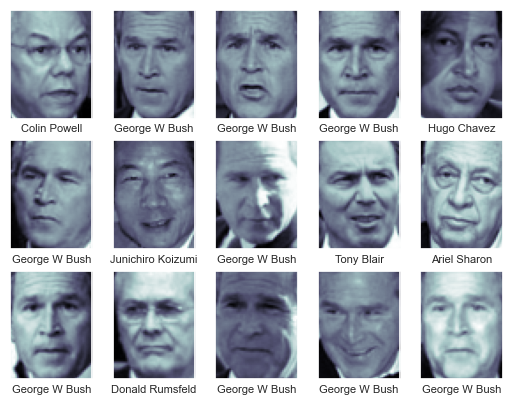

In [19]:
#Graficamos algunas caras   
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[faces.target[i]], fontsize=8)

Cada imagen contiene [62x47] o 3000 pixeles aprox. Podríamos usar cada pixel como variable, pero ya que serían demasiadas variables vamos a preprocesar los datos para extraer variables más importantes. 

Utilizaremos el análisis de componentes principales para extraer 150 componentes que alimenten nuestra máquina. 

In [20]:
#Primero dividimos nuestros datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = faces.data
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#extraemos los eigenvectores
eigenfaces = pca.components_.reshape((150, h, w))

Usamos el método de grid search para ajustar los hiperparámetros. 
Aquí vamos a ajustar dos cosas:

- Ajustamos el parámetro "C" (controla la dureza del margen)
- Ajustamos el parámetro "Gamma" (controla el tamaño de la función del kernel de base radial)

Y determinamos el mejor modelo:

In [22]:
#Usamos el método de grid search para ajustar los hiperparámetros
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]} #por lo general son valores menores a 1

# class_weight se utiliza para problemas de clasificación multivariable, es decir, cuando nuestras clases no son binarias
model = SVC(kernel='rbf', class_weight='balanced') 
grid = GridSearchCV(model, param_grid)

grid.fit(X_train_pca, y_train)
print(grid.best_params_)

{'C': 1, 'gamma': 0.001}


Ahora con este modelo donde usamos el grid search y cross validation, podemos predecir las clases para los datos de prueba, datos que el modelo no ha visto antes. 

In [23]:
model = grid.best_estimator_ #tome el modelo con los hiperparametros optimos
y_pred = model.predict(X_test_pca)

In [24]:
#Predicciones
y_pred

array([3, 4, 3, 6, 6, 1, 3, 4, 3, 1, 3, 3, 0, 3, 2, 1, 7, 2, 3, 2, 7, 3,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 2, 3, 2, 3, 7, 0, 3, 2, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 7, 2, 5, 4,
       7, 3, 4, 5, 1, 5, 4, 1, 3, 5, 0, 4, 3, 3, 3, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 1, 7, 3, 3, 5, 3, 7, 1, 5, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 7, 4, 1, 3, 2, 7, 4, 7, 7, 5, 3, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 3, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 7, 7, 1,
       7, 1, 3, 0, 1, 4, 6, 1, 7, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 1, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 3, 3, 7, 5, 6, 3, 7, 3,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 3, 3,
       1, 3, 1, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 7, 7, 3, 3, 1, 3, 4,
       7, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 7], dtype=int64)

In [25]:
#Datos reales
y_test

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 7, 2, 3, 2, 7, 3,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 7, 1,
       3, 3, 5, 1, 1, 2, 7, 3, 5, 6, 7, 3, 7, 1, 7, 0, 4, 2, 4, 2, 5, 4,
       7, 3, 4, 3, 1, 3, 4, 1, 3, 5, 0, 4, 3, 3, 3, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 3, 2, 7, 3, 1, 7, 3, 3, 3, 3, 7, 3, 4, 3, 3, 0, 3, 7, 3,
       3, 1, 0, 7, 7, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 3, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 3, 3, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 1, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 1, 3, 2, 3, 1, 7, 0, 2, 1, 7, 1, 3, 1, 1,
       1, 3, 3, 1, 1, 4, 1, 1, 7, 1, 1, 5, 3, 3, 3, 3, 4, 5, 6, 3, 7, 3,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 4, 3,
       1, 1, 5, 7, 7, 2, 2, 7, 5, 7, 1, 3, 3, 7, 3, 4, 7, 4, 3, 1, 3, 4,
       5, 1, 4, 3, 2, 1, 5, 3, 2, 3, 4, 1, 1, 1, 0, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 2], dtype=int64)

Observamos algunas de las imágenes de prueba con sus valores predecidos

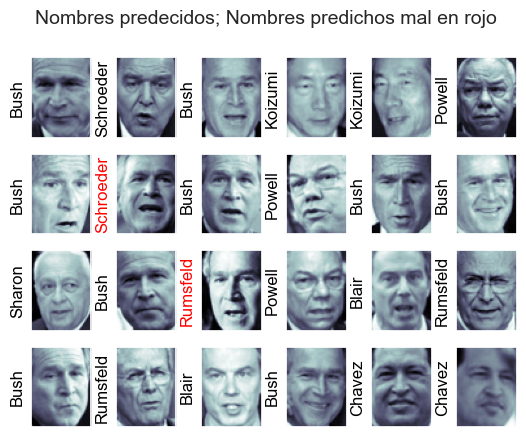

In [26]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Nombres predecidos; Nombres predichos mal en rojo', size=14);

Con estos datos, nuestro modelo clasificó erróneamente algunas caras (la de Bush la clasificó como Blair). 

Usamos un reporte de clasificación: 

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.83      0.74        12
     Colin Powell       0.88      0.88      0.88        51
  Donald Rumsfeld       0.77      0.80      0.78        25
    George W Bush       0.94      0.84      0.89        98
Gerhard Schroeder       0.79      0.71      0.75        21
      Hugo Chavez       0.73      0.73      0.73        15
Junichiro Koizumi       1.00      1.00      1.00        10
       Tony Blair       0.77      0.95      0.85        38

         accuracy                           0.85       270
        macro avg       0.82      0.84      0.83       270
     weighted avg       0.86      0.85      0.85       270



Vamos a observar qué es lo que hace el PCA.

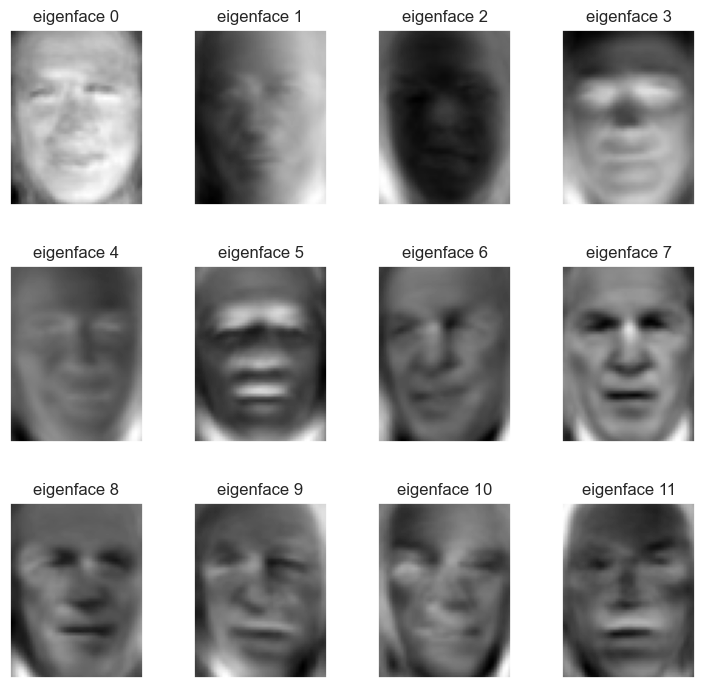

In [28]:
#funcion para graficar las imagenes
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()


**Ventajas de la máquina de vector soporte**

- Son modelos muy compactos, usan muy poca memoria
- Una vez que el modelo ya está entrenado, la fase de predicción es muy rápida
- Como son afectados sólo por los puntos cerca del margen, funcionan muy bien con datos que tienen alta dimensionalidad, aún cuando hay más dimensiones que observaciones. 
- Su integración con el truco del kernel los hacen métodos muy versátiles, lo cual hace que se adapten a muchos tipos de datos. 

**Desventajas**
- El tiempo de entrenamiento de los datos es alto, por lo que si se tiene una gran cantidad de observaciones, el modelo es muy tardado. 
- Los resultados son muy dependientes de la variable "C", la cual tiene que ser elegida cuidadosamente via cross valitadion, lo cual puede ser costoso computacionalmente si se tienen muchos datos. 
- Los resultados no tienen una interpretación probabilística, sólo de clasificación. Se puede estimar internamente via cross validation (ver el parámetro de "probability" del SVC), pero esta estimación extra es costosa. 
